## Step 1: Importing Libraries
We start by importing essential libraries:
- `yfinance`: for downloading stock data.
- `RandomForestClassifier` and metrics from `sklearn`: for building and evaluating our model.
- `pandas`, `numpy`, and `matplotlib`: for data manipulation and visualization.

In [54]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Downloading the S&P 500 Stock Data
Using `yfinance`, we download historical data for the S&P 500 index and plot the closing prices over time to visualize trends.

<Axes: xlabel='Date'>

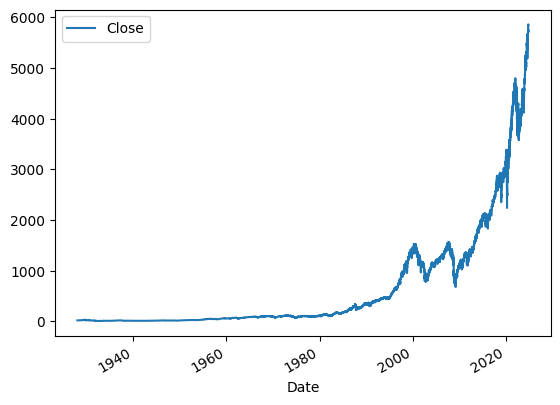

In [55]:
stock = yf.Ticker("^GSPC")
stock = stock.history(period="max")
stock.plot.line(y="Close", use_index=True)

In [56]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-10 00:00:00-04:00,5778.359863,5795.029785,5764.759766,5780.049805,3208790000,0.0,0.0
2024-10-11 00:00:00-04:00,5775.089844,5822.129883,5775.089844,5815.029785,3208720000,0.0,0.0
2024-10-14 00:00:00-04:00,5829.810059,5871.410156,5829.569824,5859.850098,3005250000,0.0,0.0


## Step 3: Data Preparation
To prepare the dataset:
- **Remove Non-Essential Columns**: We drop the `"Dividends"` and `"Stock Splits"` columns, as they’re not needed for this analysis.
- **Target Variable Creation**: We create a `Target` column, where 1 indicates the next day’s closing price is higher, and 0 otherwise.

In [57]:
del stock["Dividends"]
del stock["Stock Splits"]

stock["Tomorrow"] = stock["Close"].shift(-1)
stock["Target"] = (stock["Tomorrow"] > stock["Close"]).astype(int)

stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-10-10 00:00:00-04:00,5778.359863,5795.029785,5764.759766,5780.049805,3208790000,5815.029785,1
2024-10-11 00:00:00-04:00,5775.089844,5822.129883,5775.089844,5815.029785,3208720000,5859.850098,1
2024-10-14 00:00:00-04:00,5829.810059,5871.410156,5829.569824,5859.850098,3005250000,5815.259766,0


## Step 4: Filtering the Data
We limit the dataset to data from January 1, 1990, onward, due to a potential market shift.

In [58]:
stock = stock.loc["1990-01-01":].copy()
stock.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


## Step 5: Defining the Prediction Function
The `predict` function trains the model and generates predictions based on a probability threshold:
- **Model Training**: We train the model on the training set using the specified `predictors`.
- **Probability Predictions**: The model outputs probabilities, allowing us to set a custom threshold `c`.
- **Threshold Adjustment**: Predictions are converted to binary outcomes, where values above `c` are classified as 1, and below as 0.
- **Combining Predictions**: The function returns a DataFrame with both actual and predicted values for comparison.

In [59]:
def predict(train, test, predictors, model, c):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= c] = 1
    preds[preds < c] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

## Step 6: Implementing the Backtesting Function
The `backtest` function evaluates the model's performance over a rolling window, simulating how it would perform over time:
- **Test Windows**: The function iterates over the data, training on the first `i` rows and testing on the next `step` rows. This mimics a real-world scenario where we would train on past data to predict future outcomes in order to prevent leakage.
- **Model Predictions**: At each step, it calls the `predict` function, storing the results for further analysis.
- **Combining Results**: Finally, it concatenates all prediction DataFrames to show a full set of actual vs. predicted outcomes over the testing period.

In [60]:
def backtest(data, model, predictors, c, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model, c)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

## Step 7: Creating New Predictors
To capture various trends and patterns over different time horizons, we generate new features based on rolling averages and trends:
- **Defining Horizons**: We define a range of time horizons `[2, 5, 60, 250, 1000]` days to reflect both short-term and long-term trends in the stock data.
- **Rolling Averages**: For each horizon, we calculate the rolling average of the closing price. This helps to smooth out volatility and capture overall movement.
  - **Close Ratio**: We then calculate the ratio of the current closing price to the rolling average. This ratio indicates how the latest price compares to recent trends.
- **Trend Sum**: For each horizon, we also sum the `Target` values over the given time period. This `Trend` feature represents how many times the price increased over each horizon.
  
These new predictors are then appended to the list of features, `new_predictors`, which will be used to train the model.

In [61]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = stock.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  stock[ratio_column] = stock["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  stock[trend_column] = stock.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [62]:
stock = stock.dropna()
stock.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


## Step 8: Training the Model and Evaluating Performance
In this step, we train a `RandomForestClassifier` and evaluate its performance using a specific threshold `c`:

- **Model Initialization**: We initialize the `RandomForestClassifier` with `300` estimators and set `min_samples_split` to `50` to control tree depth and improve generalization. The `random_state` ensures reproducibility.
  
- **Backtesting**: We use the `backtest` function to train and test the model on our dataset, applying the `new_predictors` we generated earlier. Setting `c = 0.60` specifies the threshold for classifying the probability outputs.
  
- **Performance Metric**: We calculate the **precision score**, which measures how many of the predicted positive cases are true positives. This provides insight into the model’s effectiveness in identifying upward trends accurately.



In [63]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=50, random_state=1)

performance_metrics = []
c = 0.60

predictions = backtest(stock, model, new_predictors, c)
accuracy = precision_score(predictions["Target"], predictions["Predictions"])

print(f"Accuracy: {accuracy}")

Accuracy:  0.5726600985221675


## Step 9: Analyzing Model Performance and Visualizing Results

### Feature Importances
To understand which features have the most impact on the model’s predictions, we visualize the feature importances:
- **Feature Importance Plot**: We retrieve the feature importances from the trained model and plot them in a horizontal bar chart.
- **Interpretation**: Features with higher values contribute more significantly to the model’s decision-making process. This plot helps identify the most influential predictors.

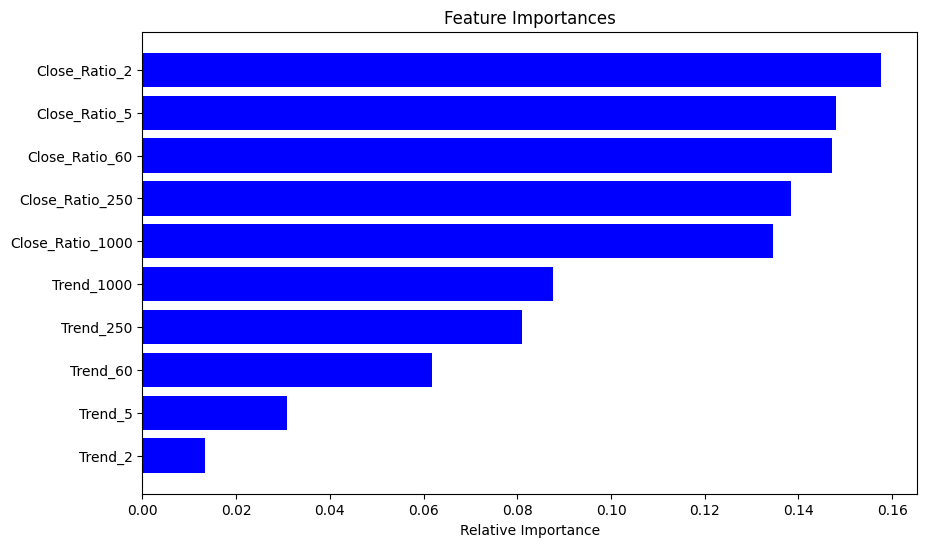

In [64]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [new_predictors[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cumulative Correct Predictions
To visualize the model's accuracy over time, we plot the cumulative sum of correct predictions:
- **Cumulative Plot**: This line chart shows the total correct predictions over time, providing a sense of the model’s consistency in identifying trends.
- **Interpretation**: A steady upward trend in the plot suggests stable performance, while any plateau or dip indicates periods of reduced accuracy.

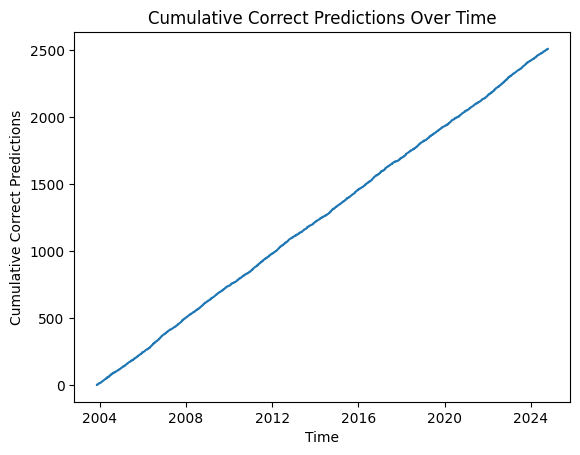

In [65]:
predictions['Correct Predictions'] = (predictions['Target'] == predictions['Predictions']).astype(int)

plt.plot(predictions.index, predictions['Correct Predictions'].cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative Correct Predictions')
plt.title('Cumulative Correct Predictions Over Time')
plt.show()

### Confusion Matrix
We visualize the confusion matrix to assess the model's classification performance:
- **Confusion Matrix**: This plot provides a breakdown of true positives, true negatives, false positives, and false negatives.
- **Interpretation**: The diagonal elements (top-left and bottom-right) represent correct predictions, while off-diagonal elements indicate misclassifications. This matrix is useful for evaluating both types of errors.

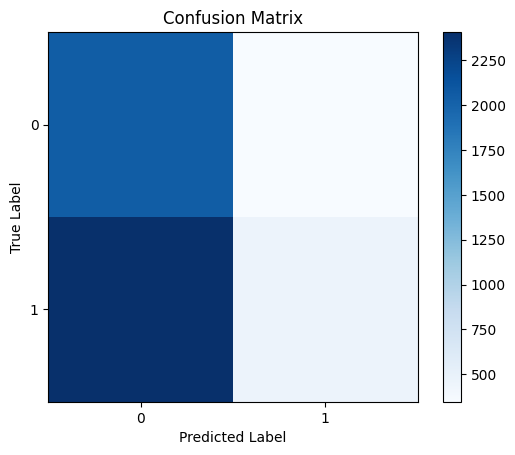

In [66]:
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], labels=["0", "1"])
plt.yticks([0, 1], labels=["0", "1"])
plt.show()

## Step 10: Calculating Returns and Evaluating Strategy Performance

### Daily and Cumulative Returns
To assess the profitability of the trading strategy, we calculate returns:
- **Daily Returns**: Using `pct_change()`, we compute the daily percentage change in the closing price, saved as `Returns`.
- **Cumulative Returns**: By taking the cumulative sum of daily returns, we obtain `Cumulative Returns`, representing the total return if we had held the asset continuously over time.


In [67]:
stock["Returns"] = stock["Close"].pct_change()
stock["Predictions"] = model.predict(stock[new_predictors])
stock["Cumulative Returns"] = stock["Returns"].cumsum()

### Strategy Returns
Next, we calculate the returns based on our model’s predictions:
- **Predicted Returns**: We multiply the daily returns by our model’s predictions (shifted by one day to avoid look-ahead bias). This gives us the returns we would achieve if we followed the model's buy/sell signals.
- **Cumulative Strategy Returns**: Taking the cumulative sum of `Strategy Returns` shows the overall performance of our trading strategy over time.

In [68]:
stock["Strategy Returns"] = stock["Returns"] * stock["Predictions"].shift()
stock["Cumulative Strategy Returns"] = stock["Strategy Returns"].cumsum()
stock["Cumulative Strategy Returns"].iloc[-1]
stock.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,Returns,Predictions,Cumulative Returns,Strategy Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,...,32.0,1.028047,127.0,1.176082,512.0,NaN,1,NaN,NaN,NaN
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,...,32.0,1.025151,126.0,1.172676,512.0,-0.002635,1,-0.002635,-0.002635,-0.002635
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,...,32.0,1.028274,127.0,1.176163,513.0,0.003248,1,0.000613,0.003248,0.000613
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,...,32.0,1.034781,128.0,1.183537,514.0,0.006561,0,0.007174,0.006561,0.007174
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,...,32.0,1.033359,128.0,1.181856,513.0,-0.001136,0,0.006038,-0.000000,0.007174


### Evaluating Total Return
To quantify the strategy's performance:
- **Total Strategy Return**: We calculate the final cumulative return by taking the last value of `Cumulative Strategy Returns`. This shows the total return achieved by the model over the testing period.
- **Period Duration**: By finding the start and end dates, we calculate the total number of days and convert this to years. This helps contextualize the total return over the entire investment horizon.

In [69]:
start_date = stock.index[0]
end_date = stock.index[-1]
total_days = (end_date - start_date).days
total_years = round(total_days / 365, 2)

total_strategy_return = round(stock["Cumulative Strategy Returns"].iloc[-1], 2)

print(f"We achieved {total_strategy_return}% in {total_years} years.")

We achieved 23.74% in 30.85 years.
